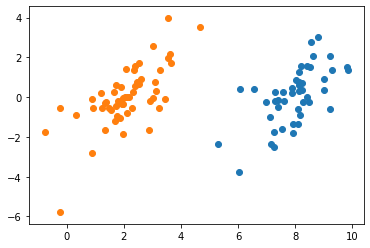

In [1]:
# -*- coding:UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
"""
函数说明:读取数据

Parameters:
    fileName - 文件名
Returns:
    dataMat - 数据矩阵
    labelMat - 数据标签
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():                                     #逐行读取，滤除空格等
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])      #添加数据
        labelMat.append(float(lineArr[2]))                          #添加标签
    return dataMat,labelMat

"""
函数说明:数据可视化

Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def showDataSet(dataMat, labelMat):
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1])   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1]) #负样本散点图
    plt.show()

if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('testSet.txt')
    showDataSet(dataMat, labelMat)

In [12]:
"""
函数说明:随机选择alpha

Parameters:
    i - alpha
    m - alpha参数个数
Returns:
    j -
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def selectJrand(i, m):
    j = i                                 #选择一个不等于i的j
    while (j == i):
        j = int(np.random.uniform(0, m))
    return j

"""
函数说明:修剪alpha

Parameters:
    aj - alpha值
    H - alpha上限
    L - alpha下限
Returns:
    aj - alpah值
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-21
"""
def clipAlpha(aj,H,L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

In [13]:
"""
函数说明:简化版SMO算法

Parameters:
    dataMatIn - 数据矩阵
    classLabels - 数据标签
    C - 松弛变量
    toler - 容错率
    maxIter - 最大迭代次数
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    #转换为numpy的mat存储
    dataMatrix = np.mat(dataMatIn); labelMat = np.mat(classLabels).transpose()
    #初始化b参数，统计dataMatrix的维度
    b = 0; m,n = np.shape(dataMatrix)
    #初始化alpha参数，设为0
    alphas = np.mat(np.zeros((m,1)))
    #初始化迭代次数
    iter_num = 0
    #最多迭代matIter次
    while (iter_num < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            #步骤1：计算误差Ei
            fXi = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])
            #优化alpha，更设定一定的容错率。
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                #随机选择另一个与alpha_i成对优化的alpha_j
                j = selectJrand(i,m)
                #步骤1：计算误差Ej
                fXj = float(np.multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                #保存更新前的aplpha值，使用深拷贝
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                #步骤2：计算上下界L和H
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                #步骤3：计算eta
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                #步骤4：更新alpha_j
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                #步骤5：修剪alpha_j
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("alpha_j变化太小"); continue
                #步骤6：更新alpha_i
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])
                #步骤7：更新b_1和b_2
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                #步骤8：根据b_1和b_2更新b
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                #统计优化次数
                alphaPairsChanged += 1
                #打印统计信息
                print("第%d次迭代 样本:%d, alpha优化次数:%d" % (iter_num,i,alphaPairsChanged))
        #更新迭代次数
        if (alphaPairsChanged == 0): iter_num += 1
        else: iter_num = 0
        print("迭代次数: %d" % iter_num)
    return b,alphas

In [14]:
"""
函数说明:分类结果可视化

Parameters:
    dataMat - 数据矩阵
    w - 直线法向量
    b - 直线解决
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def showClassifer(dataMat, w, b):
    #绘制样本点
    data_plus = []                                  #正样本
    data_minus = []                                 #负样本
    for i in range(len(dataMat)):
        if labelMat[i] > 0:
            data_plus.append(dataMat[i])
        else:
            data_minus.append(dataMat[i])
    data_plus_np = np.array(data_plus)              #转换为numpy矩阵
    data_minus_np = np.array(data_minus)            #转换为numpy矩阵
    plt.scatter(np.transpose(data_plus_np)[0], np.transpose(data_plus_np)[1], s=30, alpha=0.7)   #正样本散点图
    plt.scatter(np.transpose(data_minus_np)[0], np.transpose(data_minus_np)[1], s=30, alpha=0.7) #负样本散点图
    #绘制直线
    x1 = max(dataMat)[0]
    x2 = min(dataMat)[0]
    a1, a2 = w
    b = float(b)
    a1 = float(a1[0])
    a2 = float(a2[0])
    y1, y2 = (-b- a1*x1)/a2, (-b - a1*x2)/a2
    plt.plot([x1, x2], [y1, y2])
    #找出支持向量点
    for i, alpha in enumerate(alphas):
        if abs(alpha) > 0:
            x, y = dataMat[i]
            plt.scatter([x], [y], s=150, c='none', alpha=0.7, linewidth=1.5, edgecolor='red')
    plt.show()

L==H
第0次迭代 样本:1, alpha优化次数:1
第0次迭代 样本:2, alpha优化次数:2
L==H
alpha_j变化太小
L==H
L==H
L==H
L==H
L==H
L==H
第0次迭代 样本:23, alpha优化次数:3
L==H
第0次迭代 样本:26, alpha优化次数:4
L==H
第0次迭代 样本:29, alpha优化次数:5
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:54, alpha优化次数:6
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
第0次迭代 样本:1, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
第0次迭代 样本:44, alpha优化次数:2
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第0次迭代 样本:78, alpha优化次数:3
L==H
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
L==H
alpha_j变化太小
第1次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
第1次迭代 样本:95, alpha优化次数:2
L==H
迭代次数: 0
alpha_j变化太小
第0次迭代 样本:1, alpha

迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
第9次迭代 样本:29, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
第1次迭代 样本:54, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
第0次迭代 样本:23, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
第0次迭代 样本:17, alpha优化次数:1
alpha_j变

迭代次数: 2
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
第8次迭代 样本:55, alpha优化次数:1
迭代次数: 0
第0次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 10
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 11
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 12
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 13
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 14
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 15
alpha_j变化太小
alpha_j变

alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 10
第10次迭代 样本:29, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
第1次迭代 样本:17, alpha优化次数:1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
第4次迭代 样本:55, alpha优化次数:1
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小

迭代次数: 6
alpha_j变化太小
第6次迭代 样本:52, alpha优化次数:1
alpha_j变化太小
迭代次数: 0
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 1
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 2
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 3
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 4
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 5
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 6
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 7
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 8
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 9
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 10
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 11
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 12
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 13
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 14
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 15
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 16
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 17
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 18
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 19
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 20
alpha_j变化太小
alpha_j变化太小
alpha_j变化太小
迭代次数: 21

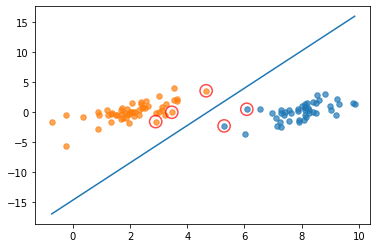

In [15]:
"""
函数说明:计算w

Parameters:
    dataMat - 数据矩阵
    labelMat - 数据标签
    alphas - alphas值
Returns:
    无
Author:
    Jack Cui
Blog:
    http://blog.csdn.net/c406495762
Zhihu:
    https://www.zhihu.com/people/Jack--Cui/
Modify:
    2017-09-23
"""
def get_w(dataMat, labelMat, alphas):
    alphas, dataMat, labelMat = np.array(alphas), np.array(dataMat), np.array(labelMat)
    w = np.dot((np.tile(labelMat.reshape(1, -1).T, (1, 2)) * dataMat).T, alphas)
    return w.tolist()


if __name__ == '__main__':
    dataMat, labelMat = loadDataSet('testSet.txt')
    b,alphas = smoSimple(dataMat, labelMat, 0.6, 0.001, 40)
    w = get_w(dataMat, labelMat, alphas)
    showClassifer(dataMat, w, b)